<a href="https://colab.research.google.com/github/Heisenberg503/Ecommerce-website-/blob/main/Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv("/content/credit_risk_dataset.csv")

In [4]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
df.shape

(32581, 12)

In [7]:
"""
person_age: Age of the individual applying for the loan.
person_income: Annual income of the individual.
person_home_ownership: Type of home ownership of the individual.
rent: The individual is currently renting a property.
mortgage: The individual has a mortgage on the property they own.
own: The individual owns their home outright.
other: Other categories of home ownership that may be specific to the dataset.
person_emp_length: Employment length of the individual in years.
loan_intent: The intent behind the loan application.
loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.
A: The borrower has a high creditworthiness, indicating low risk.
B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
C: The borrower's creditworthiness is moderate.
D: The borrower is considered to have higher risk compared to previous grades.
E: The borrower's creditworthiness is lower, indicating a higher risk.
F: The borrower poses a significant credit risk.
G: The borrower's creditworthiness is the lowest, signifying the highest risk.
loan_amnt: The loan amount requested by the individual.
loan_int_rate: The interest rate associated with the loan.
loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
loan_percent_income: The percentage of income represented by the loan amount.
cb_person_default_on_file: Historical default of the individual as per credit bureau records.
Y: The individual has a history of defaults on their credit file.
N: The individual does not have any history of defaults.
cb_preson_cred_hist_length: The length of credit history for the individual
"""

"\nperson_age: Age of the individual applying for the loan.\nperson_income: Annual income of the individual.\nperson_home_ownership: Type of home ownership of the individual.\nrent: The individual is currently renting a property.\nmortgage: The individual has a mortgage on the property they own.\nown: The individual owns their home outright.\nother: Other categories of home ownership that may be specific to the dataset.\nperson_emp_length: Employment length of the individual in years.\nloan_intent: The intent behind the loan application.\nloan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.\nA: The borrower has a high creditworthiness, indicating low risk.\nB: The borrower is relatively low-risk, but not as creditworthy as Grade A.\nC: The borrower's creditworthiness is moderate.\nD: The borrower is considered to have higher risk compared to previous grades.\nE: The borrower's creditworthiness is lower, indicating a higher risk.\nF: The borrower pos

In [8]:
#huge imbalance
df.loan_status.value_counts()

,count
loan_status,
0,25473
1,7108


In [9]:
#filling out NAN values
df['person_emp_length'].fillna(df['person_emp_length'].mode()[0],inplace=True)

<ipython-input-9-ec65fe68befd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].mode()[0],inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [11]:
df['loan_int_rate'].fillna(df['loan_int_rate'].median(),inplace=True)

<ipython-input-11-70a5345cd64d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loan_int_rate'].fillna(df['loan_int_rate'].median(),inplace=True)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [13]:
df.describe()#outliers person_age = 144 and employment_length = 123

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.658114,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.159669,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Dealing with outliers

In [14]:
x = df['person_age'].value_counts().index

In [15]:
y = df['person_age'].value_counts().values

<BarContainer object of 58 artists>

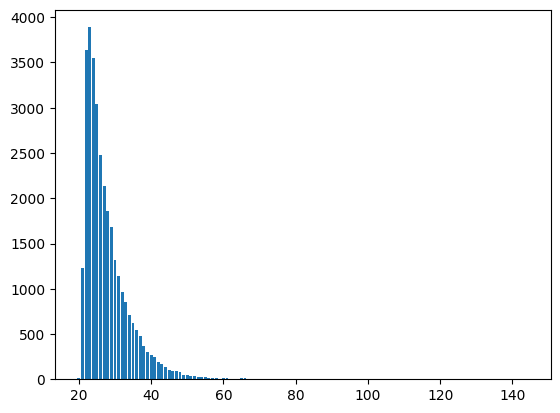

In [16]:
plt.bar(x,y)#this says person having age above 80 have very less counts we can remove the outlier

<BarContainer object of 36 artists>

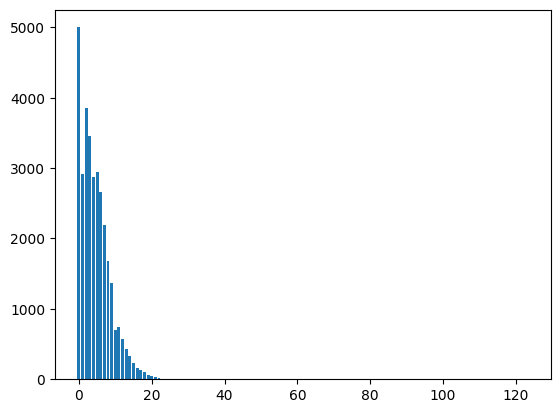

In [17]:
x_ = df['person_emp_length'].value_counts().index
y_ = df['person_emp_length'].value_counts().values
plt.bar(x_,y_)#ig below 40 length is fair enough

In [18]:
print(x_)
print(y_)

Index([  0.0,   2.0,   3.0,   5.0,   1.0,   4.0,   6.0,   7.0,   8.0,   9.0,
        11.0,  10.0,  12.0,  13.0,  14.0,  15.0,  16.0,  17.0,  18.0,  19.0,
        20.0,  21.0,  22.0,  24.0,  23.0,  25.0,  26.0,  27.0,  31.0,  28.0,
       123.0,  30.0,  41.0,  34.0,  29.0,  38.0],
      dtype='float64', name='person_emp_length')
[5000 3849 3456 2946 2915 2874 2666 2196 1687 1367  740  696  575  426
  335  238  165  129  104   64   42   38   19   10   10    8    6    5
    4    3    2    2    1    1    1    1]


In [19]:
df.drop(df[df['person_age']>80].index,inplace=True)

In [20]:
df.drop(df[df['person_emp_length']>40].index,inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32571 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32571 non-null  int64  
 1   person_income               32571 non-null  int64  
 2   person_home_ownership       32571 non-null  object 
 3   person_emp_length           32571 non-null  float64
 4   loan_intent                 32571 non-null  object 
 5   loan_grade                  32571 non-null  object 
 6   loan_amnt                   32571 non-null  int64  
 7   loan_int_rate               32571 non-null  float64
 8   loan_status                 32571 non-null  int64  
 9   loan_percent_income         32571 non-null  float64
 10  cb_person_default_on_file   32571 non-null  object 
 11  cb_person_cred_hist_length  32571 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


Feature Engineering

In [22]:
#person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
from sklearn.preprocessing import LabelEncoder

In [23]:
fe = ['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file']

In [24]:
for i in fe:
    df[i] = LabelEncoder().fit_transform(df[i])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32571 entries, 1 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32571 non-null  int64  
 1   person_income               32571 non-null  int64  
 2   person_home_ownership       32571 non-null  int64  
 3   person_emp_length           32571 non-null  float64
 4   loan_intent                 32571 non-null  int64  
 5   loan_grade                  32571 non-null  int64  
 6   loan_amnt                   32571 non-null  int64  
 7   loan_int_rate               32571 non-null  float64
 8   loan_status                 32571 non-null  int64  
 9   loan_percent_income         32571 non-null  float64
 10  cb_person_default_on_file   32571 non-null  int64  
 11  cb_person_cred_hist_length  32571 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 3.2 MB


In [26]:
x = df.drop(columns=['loan_status'])
y = df['loan_status']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

Feature Importance

In [27]:
rf = RandomForestClassifier()

In [28]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
from sklearn.metrics import accuracy_score,classification_report

In [30]:
accuracy_score(y_test,rf.predict(x_test))

0.93584036838066

In [31]:
rf.feature_importances_

array([0.04364701, 0.14315961, 0.1055925 , 0.06149062, 0.0734301 ,
       0.12229188, 0.0746278 , 0.10289835, 0.22733907, 0.01056239,
       0.03496066])

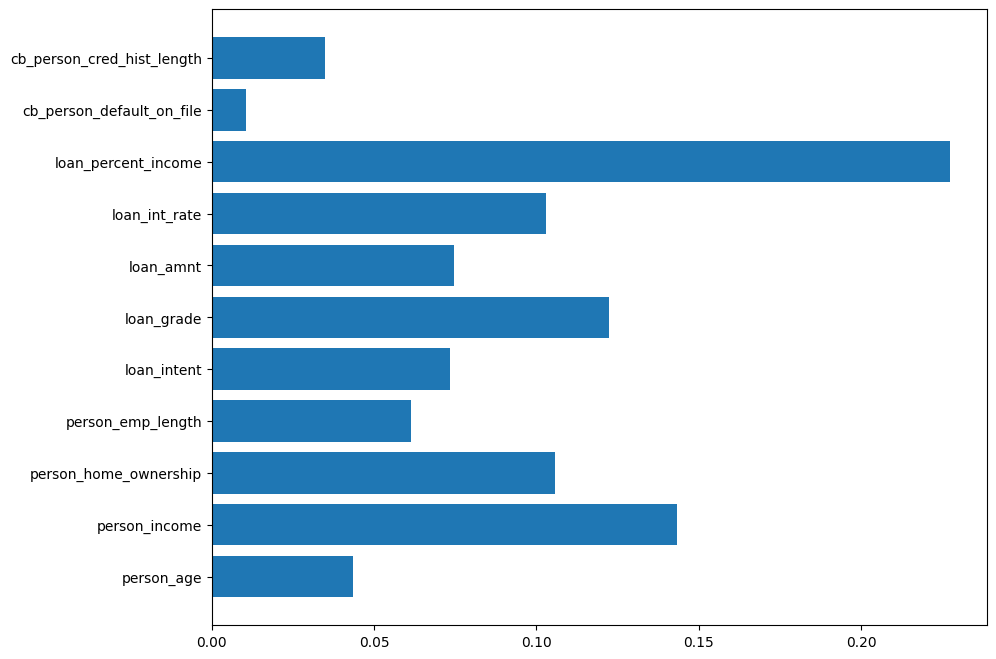

In [32]:
hori = x_train.columns
verti = rf.feature_importances_
dic = pd.DataFrame({
    'Feature':hori,
    'Importance':verti
})
plt.figure(figsize=(10,8))
plt.barh(dic['Feature'],dic['Importance'])
plt.show()

In [33]:
X = df.drop(columns=['person_age','cb_person_default_on_file','cb_person_cred_hist_length'])
Y = df['loan_status']

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

In [35]:
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [36]:
accuracy_score(Y_test,rf.predict(X_test))

1.0

In [37]:
print(classification_report(Y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5079
           1       1.00      1.00      1.00      1436

    accuracy                           1.00      6515
   macro avg       1.00      1.00      1.00      6515
weighted avg       1.00      1.00      1.00      6515



In [38]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

param_dist = {
    'n_estimators': [50, 75, 100, 150, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 7, 10, 13, 15],
    'bootstrap': [True],
    'oob_score': [True, False]
}

clf = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1)
clf.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
450 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 448, in fit
    raise ValueError("Out of 

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 7, 10, 13, 15],
                         'n_estimators': [50, 75, 100, 150, 200],
                         'oob_score': [True, False]})

In [40]:
clf.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'n_estimators': 50,
 'oob_score': True}

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=None,bootstrap=True,oob_score=True)
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50, oob_score=True)

In [43]:
accuracy_score(Y_test,rfc.predict(X_test))

1.0